<a href="https://colab.research.google.com/github/dishantgupta2004/Deep-Learning-Assignments/blob/main/DishantGupta_DeepLearning_ActivationFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Explain the role of activation functions in neural networks. Compare and contrast linear and nonlinear activation functions. Why are nonlinear activation functions preferred in hidden layers ?**


Activation functions are one of fundamental part of neural networks. Choosing right activation function based upon our application , ai model we want, is very crucial. Activation functions are mathematical equations that determine the output of a neural network node (neuron).  They take the input signal (a weighted sum from the previous layer), apply a transformation to it, and pass it to the next layer.

**Why do we use them ?**
- Introduce the non linearity to the model so that it can learn complex patterns.
- control the neuron output (sequencing it to [0, 1] or [-1 1] ).
- Enable gradient based learning via backpropogation.
- ANN act as Universal approximator with activation functions.




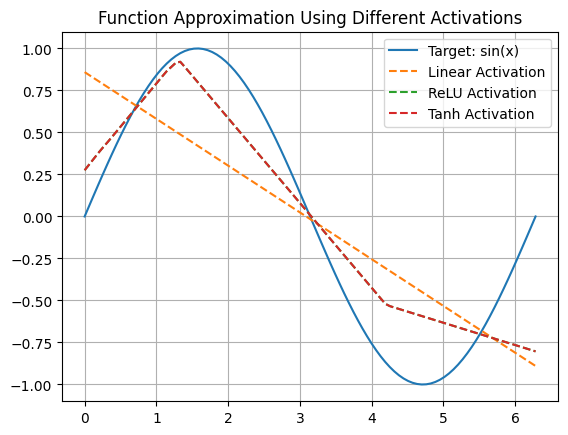

MSE - Linear Activation: 0.2043292775247685
MSE - ReLU Activation: 0.07960268388509206
MSE - Tanh Activation: 0.07960268388509206


In [6]:
### Step by step implementation in python:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Inputs and outputs
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(X).ravel()

model_linear = MLPRegressor(hidden_layer_sizes=(50,), activation='identity', max_iter=10000, random_state=1)
model_linear.fit(X, y)
pred_linear = model_linear.predict(X)


model_relu = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=10000, random_state=1)
model_relu.fit(X, y)
pred_relu = model_relu.predict(X)


model_tanh = MLPRegressor(hidden_layer_sizes=(50,), activation='tanh', max_iter=10000, random_state=1)
model_tanh.fit(X, y)
pred_tanh = model_relu.predict(X)

plt.plot(X, y, label='Target: sin(x)')
plt.plot(X, pred_linear, '--', label='Linear Activation')
plt.plot(X, pred_relu, '--', label='ReLU Activation')
plt.plot(X, pred_tanh, '--', label='Tanh Activation')
plt.title("Function Approximation Using Different Activations")
plt.legend()
plt.grid()
plt.show()

print("MSE - Linear Activation:", mean_squared_error(y, pred_linear))
print("MSE - ReLU Activation:", mean_squared_error(y, pred_relu))
print("MSE - Tanh Activation:", mean_squared_error(y, pred_tanh))





In [7]:
#### Defining the custom activation function
import torch
import torch.nn as nn
import torch.optim as optim

class SineActivation(nn.Module):
    def forward(self, x):
        return torch.sin(x)

class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.act1 = SineActivation()
        self.layer2 = nn.Linear(64, 64)
        self.act2 = SineActivation()
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        return self.output(x)

# Input data
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1).astype(np.float32)
y = np.sin(X)

# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

model = SineNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(2000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.5f}")


Epoch 0, Loss: 0.41031
Epoch 200, Loss: 0.00003
Epoch 400, Loss: 0.00001
Epoch 600, Loss: 0.00001
Epoch 800, Loss: 0.00001
Epoch 1000, Loss: 0.00001
Epoch 1200, Loss: 0.00001
Epoch 1400, Loss: 0.00000
Epoch 1600, Loss: 0.00000
Epoch 1800, Loss: 0.00000


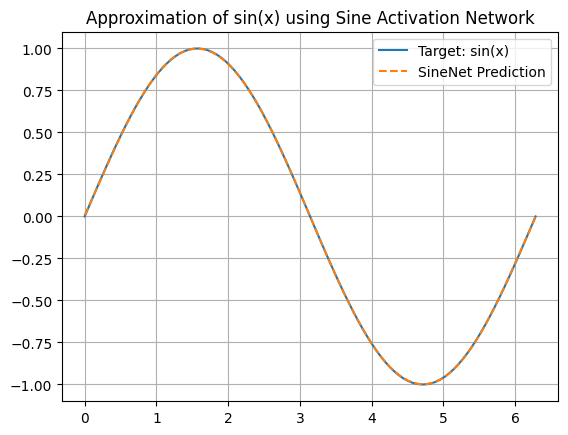

In [8]:
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()

plt.plot(X, y, label='Target: sin(x)')
plt.plot(X, predictions, '--', label='SineNet Prediction')
plt.legend()
plt.grid(True)
plt.title("Approximation of sin(x) using Sine Activation Network")
plt.show()


### **Describe the Sigmoid activation function. What are its characteristics, and in what type of layers is it commonly used? Explain the Rectified Linear Unit (ReLU) activation function. Discuss its advantages and potential challenges.What is the purpose of the Tanh activation function? How does it differ from the Sigmoid activation function?**



Text(0.5, 1.0, 'Sigmoid Function')

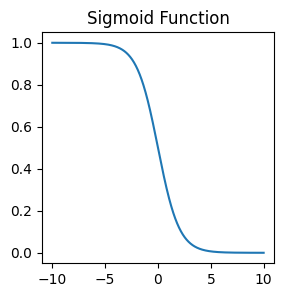

In [11]:
### Sigmoid function:
def sigmoid(x):
  return 1 / (1 + np.exp(x))

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

plt.figure(figsize= (3,3 ))
plt.plot(x, y)
plt.title('Sigmoid Function')


## Output range: (0, 1), S-shaped (sigmoid) curve, Smooth and continuously differentiable, Squashes inputs into a narrow range

## Common uses:
# 1. Output layer in binary classification problems (e.g., logistic regression)
# 2. Historically used in hidden layers (less common now)

## Drawbacks:
# Vanishing gradient problem for large positive/negative inputs, Not zero-centered (causes zigzagging during optimization) and Saturates at extreme values (gradients become near-zero)




Text(0.5, 1.0, 'relu Function')

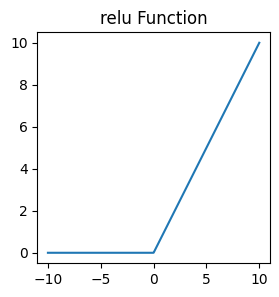

In [12]:
### Rectified Linear Unit (ReLU)
def relu(x):
  return np.maximum(0, x)

x = np.linspace(-10, 10, 1000)
y = relu(x)

plt.figure(figsize= (3,3 ))
plt.plot(x, y)
plt.title('relu Function')

# Characteristics:
## 1. Output range: [0,∞), 2. Very simple computation, 3. Introduces sparsity (many outputs are 0)

# Common Uses:
## 1. Hidden layers in most deep networks (CNNs, MLPs), 2. Dominant in modern architectures due to simplicity and performance

# Advantages:
## Efficient: Fast convergence and computation, No vanishing gradient in positive domain, Encourages sparse activations

# Challenges:
## Dying ReLU problem: Neurons can get stuck in negative input region and stop updating (output = 0)
## Fixes include Leaky ReLU, Parametric ReLU, etc.

Text(0.5, 1.0, 'tanh Function')

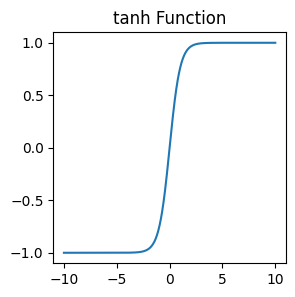

In [13]:
### Tanh activation
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


x = np.linspace(-10, 10, 1000)
y = tanh(x)

plt.figure(figsize= (3,3 ))
plt.plot(x, y)
plt.title('tanh Function')

# Characteristics:
## 1. Output range: (-1, 1)
## 2. Zero-centered
## 3. Steep gradient near 0, flat at extremes

# Where is it used?
## Hidden layers in older architectures
## Better than sigmoid in practice (because it’s zero-centered)

# Pros:
## Zero-centered output helps with optimization (gradient descent converges faster)
## Smoother and steeper than sigmoid

# Cons:
## Still suffers from vanishing gradients for large |x|
## More computationally expensive than ReLU

### **Discuss the significance of activation functions in the hidden layers of a neural network.**

1. Break Linearity: Convert linear affine transformations into non-linear mappings.
2. Enable Function Approximation: Allow networks to model any continuous function (per the Universal Approximation Theorem).
3. Make Depth Useful: Without activations, stacking layers is just matrix multiplication—depth adds no power.
4. Learn Complex Patterns: Capture relationships and features beyond linear boundaries.
5. Model Decision Boundaries: Crucial for solving non-linearly separable tasks like XOR.
6. Feature Abstraction: Higher layers build on lower ones using non-linear compositions.
7. Gradient Flow Control: Activations impact how gradients propagate during backpropagation.
8. Flexible Representation: Each neuron forms a flexible, learnable basis function.
9. Computation Efficiency: Some (like ReLU) improve training efficiency by inducing sparsity.
10. Domain Specificity: Proper activation functions improve performance for specific data types (e.g., sin for periodicity).

In [14]:
class SineActivation(nn.Module):
    def forward(self, x):
        return torch.sin(x)

class FourierLikeNet(nn.Module):
    def __init__(self):
        super(FourierLikeNet, self).__init__()
        self.layer1 = nn.Linear(1, 64)
        self.act1 = SineActivation()
        self.layer2 = nn.Linear(64, 64)
        self.act2 = SineActivation()
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        return self.output(x)

X = np.linspace(0, 2 * np.pi, 200).reshape(-1, 1).astype(np.float32)
y = np.sin(X)

X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

model = FourierLikeNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(2000):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.5f}")


Epoch 0, Loss: 0.22588
Epoch 200, Loss: 0.00003
Epoch 400, Loss: 0.00001
Epoch 600, Loss: 0.00001
Epoch 800, Loss: 0.00001
Epoch 1000, Loss: 0.00000
Epoch 1200, Loss: 0.00000
Epoch 1400, Loss: 0.00000
Epoch 1600, Loss: 0.00000
Epoch 1800, Loss: 0.00000


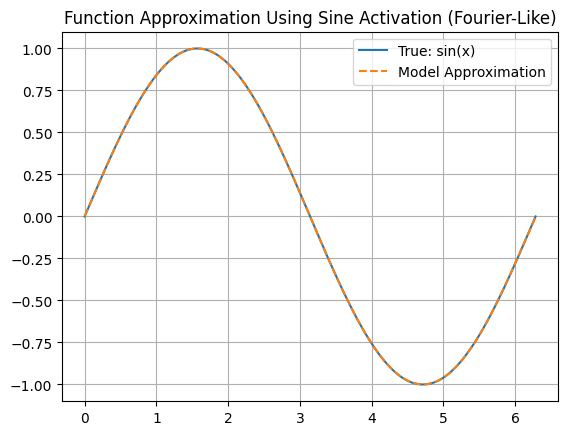

In [15]:
model.eval()
with torch.no_grad():
    preds = model(X_tensor).numpy()

plt.plot(X, y, label='True: sin(x)')
plt.plot(X, preds, '--', label='Model Approximation')
plt.title("Function Approximation Using Sine Activation (Fourier-Like)")
plt.legend()
plt.grid(True)
plt.show()


### **Explain the choice of activation functions for different types of problems (e.g., classification, regression) in the output layer.**

| Problem Type          | Output Size    | Activation Function | Range        | Typical Loss Function           |
|------------------------|----------------|----------------------|--------------|----------------------------------|
| Binary Classification  | 1              | Sigmoid              | (0, 1)       | Binary Cross Entropy            |
| Multiclass (Exclusive) | # of classes   | Softmax              | (0, 1), sum=1| Cross Entropy                   |
| Multilabel             | # of labels    | Sigmoid              | (0, 1)       | Binary Cross Entropy            |
| Regression (Unbounded) | 1 or more      | None (Linear)        | (-∞, ∞)      | MSE / MAE                       |
| Regression (Bounded)   | 1 or more      | Sigmoid or Tanh      | [0, 1] or [-1, 1] | MSE or Custom Loss      |

 ### **Experiment with different activation functions (e.g., ReLU, Sigmoid, Tanh) in a simple neural network architecture. Compare their effects on convergence and performance.**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with activation: relu
Training with activation: sigmoid
Training with activation: tanh


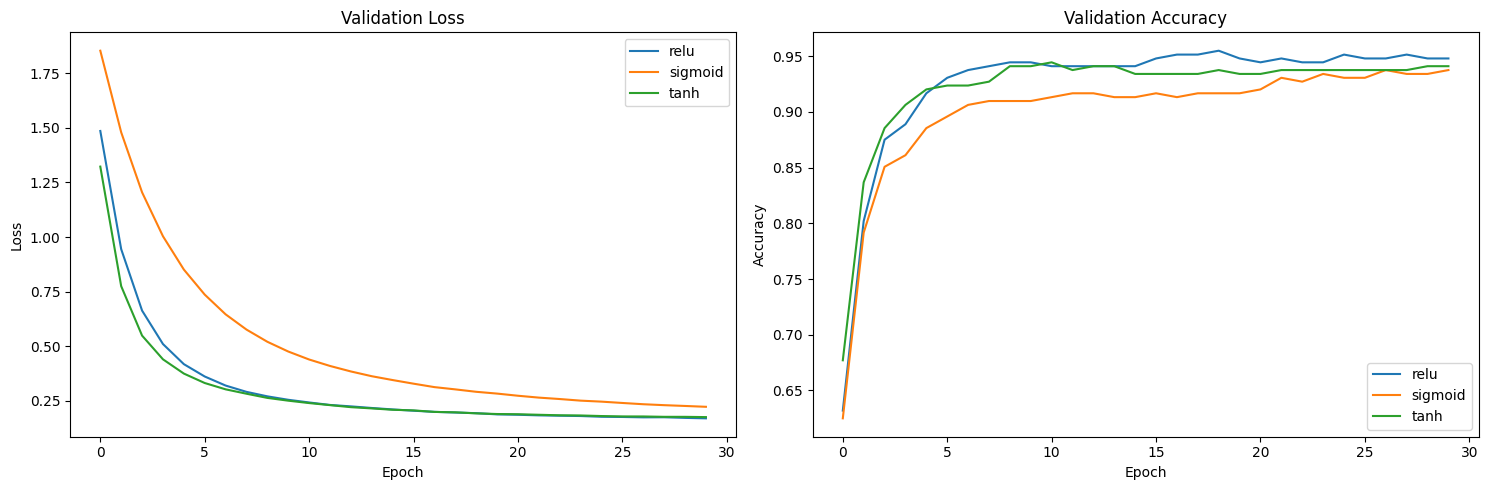

In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

digits = load_digits()
X = digits.data
y = to_categorical(digits.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

activations = ['relu', 'sigmoid', 'tanh']
history_dict = {}

for act in activations:
    model = Sequential([
        Dense(64, input_shape=(64,), activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Training with activation: {act}")
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

    history_dict[act] = history.history

# Plot results
plt.figure(figsize=(15, 5))

for i, metric in enumerate(['loss', 'accuracy']):
    plt.subplot(1, 2, i + 1)
    for act in activations:
        plt.plot(history_dict[act][f'val_{metric}'], label=act)
    plt.title(f'Validation {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.title())
    plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Print final epoch results for each activation function
print("\nFinal Validation Metrics per Activation Function:")
for act in activations:
    val_loss = history_dict[act]['val_loss'][-1]
    val_acc = history_dict[act]['val_accuracy'][-1]
    print(f"Activation: {act:7s} | Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")



Final Validation Metrics per Activation Function:
Activation: relu    | Val Loss: 0.1697 | Val Accuracy: 0.9479
Activation: sigmoid | Val Loss: 0.2225 | Val Accuracy: 0.9375
Activation: tanh    | Val Loss: 0.1754 | Val Accuracy: 0.9410


In [22]:
print("\nBest Validation Accuracy per Activation Function:")
for act in activations:
    best_acc = max(history_dict[act]['val_accuracy'])
    best_epoch = history_dict[act]['val_accuracy'].index(best_acc) + 1
    print(f"Activation: {act:7s} | Best Accuracy: {best_acc:.4f} at Epoch {best_epoch}")



Best Validation Accuracy per Activation Function:
Activation: relu    | Best Accuracy: 0.9549 at Epoch 19
Activation: sigmoid | Best Accuracy: 0.9375 at Epoch 27
Activation: tanh    | Best Accuracy: 0.9444 at Epoch 11
